In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
titanic = pd.read_csv('datasets/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
titanic.drop(['Name', 'Ticket', 'Fare', 'Cabin'],axis=1,inplace=True)

In [67]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

### Cleaning Data on Train & Test Dataset

In [68]:
titanic.fillna(titanic.Age.mean(),inplace=True)

In [69]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [70]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


### Correlation 

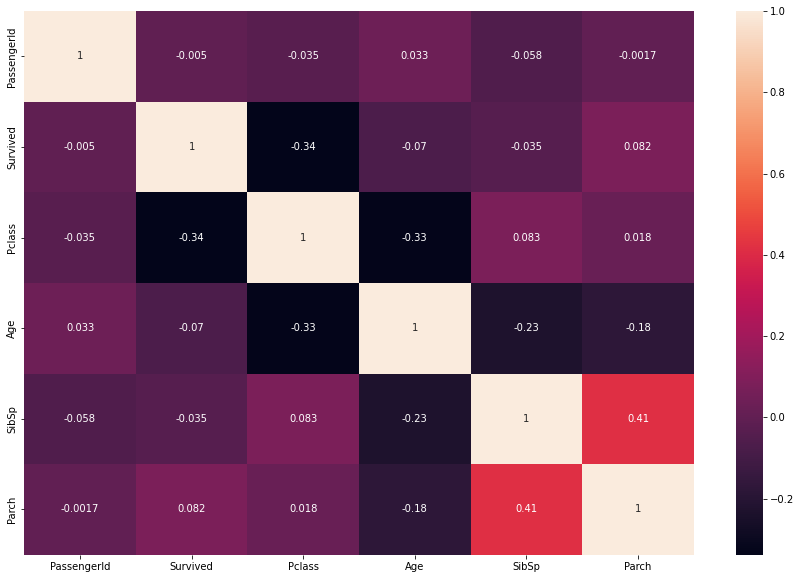

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

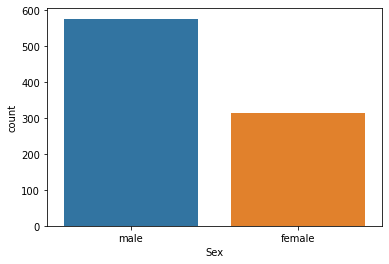

In [72]:
sns.countplot(x='Sex', data=titanic)

In [73]:
titanic['Sex'].replace(['male','female'],[0, 1], inplace=True)
titanic['Embarked'].replace(['C','Q','S'],[0, 1, 2], inplace=True)

In [74]:
X=titanic.drop('Sex',axis=1)
y=titanic['Sex']

In [75]:
X

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked
0,1,0,3,22.000000,1,0,2.0
1,2,1,1,38.000000,1,0,0.0
2,3,1,3,26.000000,0,0,2.0
3,4,1,1,35.000000,1,0,2.0
4,5,0,3,35.000000,0,0,2.0
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,2.0
887,888,1,1,19.000000,0,0,2.0
888,889,0,3,29.699118,1,2,2.0
889,890,1,1,26.000000,0,0,0.0


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)


### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree

DecisionTreeClassifier(random_state=42)

In [78]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [96]:
y_tree_pred = dtree.predict(X_test)
accuracy_score(y_test,y_tree_pred)

0.7130044843049327

<AxesSubplot:>

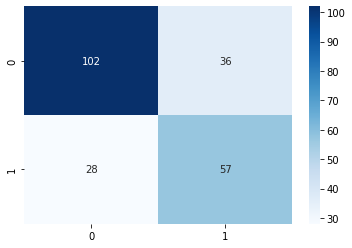

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
cf_matrix = confusion_matrix(y_test,y_tree_pred)
sns.heatmap(cf_matrix, annot=True,fmt='', cmap='Blues')

[Text(0.44216327519379844, 0.9705882352941176, 'X[1] <= 0.5\ngini = 0.451\nsamples = 668\nvalue = [439, 229]'),
 Text(0.23280038759689922, 0.9117647058823529, 'X[5] <= 1.5\ngini = 0.244\nsamples = 415\nvalue = [356, 59]'),
 Text(0.10901162790697674, 0.8529411764705882, 'X[2] <= 2.5\ngini = 0.186\nsamples = 376\nvalue = [337, 39]'),
 Text(0.031007751937984496, 0.7941176470588235, 'X[0] <= 52.5\ngini = 0.031\nsamples = 125\nvalue = [123, 2]'),
 Text(0.015503875968992248, 0.7352941176470589, 'X[3] <= 27.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.007751937984496124, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.023255813953488372, 0.6764705882352942, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.046511627906976744, 0.7352941176470589, 'X[0] <= 178.5\ngini = 0.017\nsamples = 120\nvalue = [119, 1]'),
 Text(0.03875968992248062, 0.6764705882352942, 'X[0] <= 174.5\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.031007751937984496, 0.6176470588

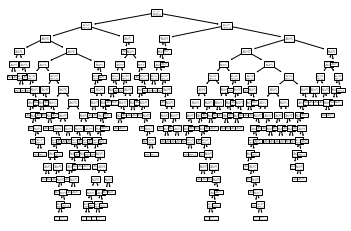

In [80]:
from sklearn import tree

tree.plot_tree(dtree)

### Optimasation Decision Tree

In [83]:
from sklearn.model_selection import GridSearchCV
param = [{"max_depth" : list(range(2, 10)),'criterion' : ['gini','entropy']}]
grid =  GridSearchCV(DecisionTreeClassifier(), param, cv = 10, n_jobs = -1)
grid = grid.fit(X_train, y_train)

In [93]:
print(f'best parameter : {grid.best_params_}\n best score : {grid.best_score_}')

best parameter : {'criterion': 'entropy', 'max_depth': 3}
 best score : 0.7845092718227047


In [98]:
from sklearn.metrics import accuracy_score
dtree_optimised=DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
dtree_optimised.fit(X_train, y_train)
y_tree_optimized_predic = dtree_optimised.predict(X_test)
dtree_score_optimized =accuracy_score(y_test,y_tree_optimized_predic)
dtree_score_optimized

0.7892376681614349

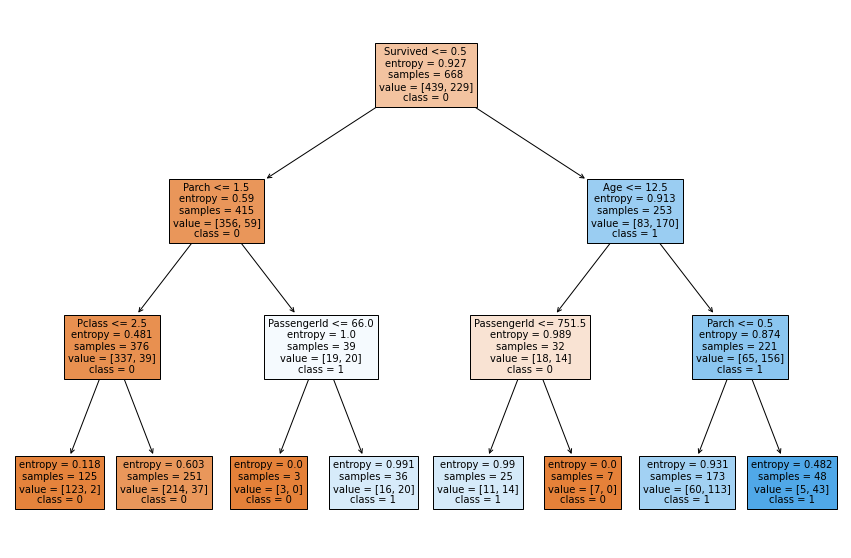

In [103]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dtree_optimised,class_names=['0','1'],feature_names=X.columns,
                   filled=True,fontsize=10)
fig.savefig("decistion_tree.png")

<AxesSubplot:>

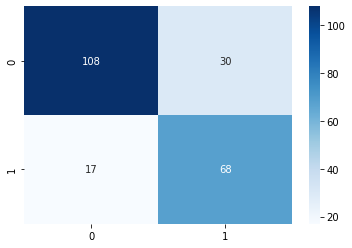

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
cf_matrix = confusion_matrix(y_test,y_tree_optimized_predic)
sns.heatmap(cf_matrix, annot=True,fmt='', cmap='Blues')

## KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pre = knn.predict(X_test)
knn_score = accuracy_score(y_test,knn_pre)
knn_score

0.5336322869955157

<AxesSubplot:>

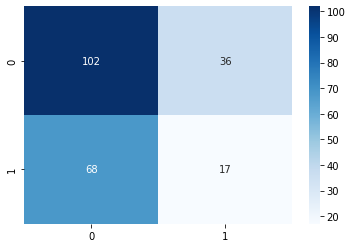

In [126]:
cf_matrix = confusion_matrix(y_test,knn_pre)
sns.heatmap(cf_matrix, annot=True,fmt='', cmap='Blues')

### Cross Validation KNN

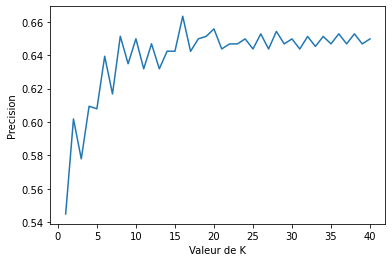

In [105]:
from sklearn.model_selection import cross_val_score
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Valeur de K')
plt.ylabel('Precision')
plt.show()

In [109]:
k_range = list(range(1, 41))
param_grid = dict(n_neighbors=k_range)
grid_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [110]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=16)

In [115]:
best_score_knn = grid_search.best_score_
best_score_knn

0.6632519222071461

In [117]:
grid_search.best_params_

{'n_neighbors': 16}

In [124]:
knn_optimized = KNeighborsClassifier(n_neighbors=16)
knn_optimized.fit(X_train,y_train)
knn_pre_op = knn_optimized.predict(X_test)
knn_score_op = accuracy_score(y_test,knn_pre_op)
knn_score_op

0.6053811659192825

<AxesSubplot:>

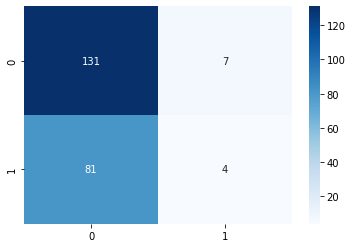

In [125]:
cf_matrix = confusion_matrix(y_test,knn_pre_op)
sns.heatmap(cf_matrix, annot=True,fmt='', cmap='Blues')

# Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)
acc_rf = cross_val_score(rf, X_train, y_train, cv=10)
acc_rf
rf_score = acc_rf.mean()
rf_score

0.7785617367706921

<AxesSubplot:>

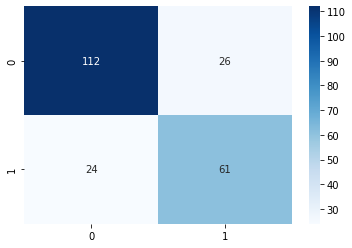

In [135]:
cf_matrix = confusion_matrix(y_test,rf_predict)
sns.heatmap(cf_matrix, annot=True,fmt='', cmap='Blues')